# Linear Regression Pytorch Demonstration
Robbie Plata

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
%matplotlib inline
from tqdm import trange
import torch.nn as nn

#### 50x1 linear float tensor

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)

#### 50x1 error tensor

In [3]:
error = torch.randint(-8,9,(50,1), dtype=torch.float)

$f(x) = 2(x) + 1 + error$

In [4]:
y = 2*X + 1 + error

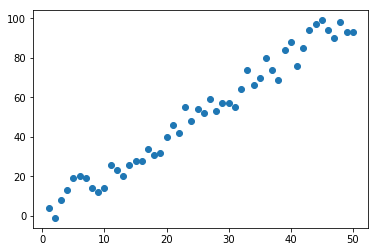

In [5]:
plt.scatter(X.numpy(), y.numpy())

In [6]:
torch.manual_seed(51)

### Linear layer Test

In [7]:
model = nn.Linear(1,1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.9745]], requires_grad=True)
Parameter containing:
tensor([0.4807], requires_grad=True)


### Single Layer Linear Regression Model with no actuation

In [8]:
class Model(nn.Module):
    
    def __init__(self, in_features, out_features):
        super().__init__() # Inherit
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

### Single Neuron Model tracking gradient

In [9]:
torch.manual_seed(51)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.9745]], requires_grad=True)
Parameter containing:
tensor([0.4807], requires_grad=True)


### Weight and bias by given manual seed

In [10]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.9744870662689209
linear.bias 	 0.4807196855545044


### Forward Propogation
$\sum\limits_{i=1}^n z(x) = (w_{i}x_{i}) + b_{i}$

In [11]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([2.4297], grad_fn=<AddBackward0>)


In [12]:
x1 = np.linspace(0.0, 50.0, 50)

### Applying and plotting an arbitrary weight and bias to a linspace tensor

In [13]:
w1 = 0.9744
b = 0.4807
y1 = w1*x1 + b
y1

array([ 0.4807    ,  1.47498571,  2.46927143,  3.46355714,  4.45784286,
        5.45212857,  6.44641429,  7.4407    ,  8.43498571,  9.42927143,
       10.42355714, 11.41784286, 12.41212857, 13.40641429, 14.4007    ,
       15.39498571, 16.38927143, 17.38355714, 18.37784286, 19.37212857,
       20.36641429, 21.3607    , 22.35498571, 23.34927143, 24.34355714,
       25.33784286, 26.33212857, 27.32641429, 28.3207    , 29.31498571,
       30.30927143, 31.30355714, 32.29784286, 33.29212857, 34.28641429,
       35.2807    , 36.27498571, 37.26927143, 38.26355714, 39.25784286,
       40.25212857, 41.24641429, 42.2407    , 43.23498571, 44.22927143,
       45.22355714, 46.21784286, 47.21212857, 48.20641429, 49.2007    ])

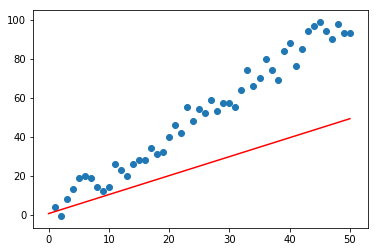

In [14]:
plt.plot(x1,y1, 'red')
plt.scatter(X.numpy(), y.numpy())

### Mean squared error 
$MSE = \frac{1}{n}\sum\limits_{i=1}^n (Y_{i} - \hat{Y}_{i})^2$

(The average of the squared differences between the predicted and actual values)

In [15]:
criterion = nn.MSELoss()

### Stochastic gradient descent with step size of 0.001
Uses the cost gradient of 1 example at each iteration.
Calculates the error for each example in the training dataset but only updates the model have all training examples are evaluated. Tiny step size.

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

### Training
1. 50 Epochs/Iterations (total passes through the dataset). 
2. Feed to output neuron.
3. Calculate loss with mean squared error.
4. Track Loss.
5. Reset gradient.
6. Minimize the cost function (backpropogate) by

- Computing the rate of change of C (cost) with respect to the output activations starting at the last layer L and finishing with with L-1 where L=2 (the last back propogation).

$δ^L=\nabla_{a} C ⊙ \sigma' (z^L)$
OR
$δ^L=(a^L-y) ⊙ \sigma' (z^L)$

Move the error backwards through the activation functions in layer 
${l}$. Written out in terms of the error in the next layer (moving backwards).

$δ^l = (w^l+1)^T δ^{l+1} ⊙ \sigma'(z^l)$

- ${T}$ - transpose
- ${l}$ - layer
- ${⊙}$ - Hadamard product
- ${𝜎}'$ - activation prime
- ${z}'$ - (weight)(input) + bias


The gradient of the cost function is given by 

### $\frac {\partial C} {\partial w^{l}_{jk}} = a^{l-1}_{k} δ^l_{j}$

### $\frac {\partial C} {\partial b^{l}_{j}} = δ^l_{j}$

7. Perform a parameter update (step) based on the gradient stored in paramater.grad.

In [17]:
epochs = 50
losses = []

for i in trange(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

epoch 1 loss: 937.1343383789062 weight: 0.9744870662689209 bias: 0.4807196855545044
epoch 2 loss: 52573.25 weight: 9.820732116699219 bias: 0.7426182627677917
epoch 3 loss: 3029251.5 weight: -57.344818115234375 bias: -1.253894567489624
epoch 4 loss: 174626480.0 weight: 452.6150207519531 bias: 13.896771430969238
epoch 5 loss: 10066727936.0 weight: -3419.293701171875 bias: -101.14380645751953
epoch 6 loss: 580318789632.0 weight: 25978.466796875 bias: 772.3027954101562
epoch 7 loss: 33453760315392.0 weight: -197226.265625 bias: -5859.41357421875
epoch 8 loss: 1928516014702592.0 weight: 1497472.625 bias: 44492.39453125
epoch 9 loss: 1.1117352764991078e+17 weight: -11369656.0 bias: -337807.5
epoch 10 loss: 6.408844371097027e+18 weight: 86324992.0 bias: 2564833.0
epoch 11 loss: 3.694519861907806e+20 weight: -655429056.0 bias: -19473688.0
epoch 12 loss: 2.1297878422205638e+22 weight: 4976395264.0 bias: 147855456.0
epoch 13 loss: 1.2277635481935885e+24 weight: -37783662592.0 bias: -1122603648.0

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1098.91it/s]

epoch 17 loss: 1.3559006134565318e+31 weight: -125562689421312.0 bias: -3730637848576.0
epoch 18 loss: 7.816387451398971e+32 weight: 953344227016704.0 bias: 28325152030720.0
epoch 19 loss: 4.505928431393284e+34 weight: -7238337911848960.0 bias: -215060840448000.0
epoch 20 loss: 2.5975415772770646e+36 weight: 5.495762413053542e+16 bias: 1632865766866944.0
epoch 21 loss: 1.4974104461027317e+38 weight: -4.172699541407007e+17 bias: -1.2397658249363456e+16
epoch 22 loss: inf weight: 3.168153969872601e+18 bias: 9.413015252657766e+16
epoch 23 loss: inf weight: -2.405445128746015e+19 bias: -7.146903920747479e+17
epoch 24 loss: inf weight: 1.8263523215275563e+20 bias: 5.426341121481507e+18
epoch 25 loss: inf weight: -1.3866718360662578e+21 bias: -4.119989696141774e+19
epoch 26 loss: inf weight: 1.052841050017541e+22 bias: 3.1281341545520195e+20
epoch 27 loss: inf weight: -7.99377584787202e+22 bias: -2.3750593948367045e+21
epoch 28 loss: inf weight: 6.06933620591687e+23 bias: 1.803281823195793e+

### Convergence around the 10th epoch.

Text(0.5, 0, 'Epoch')

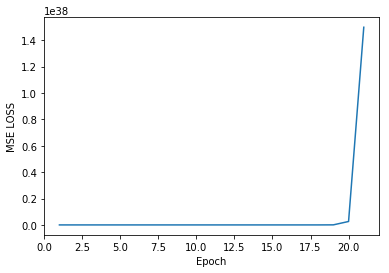

In [18]:
plt.plot(X.numpy(), losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')

### Plot of prediction
predicted_y (current weight + bias) fits to the 1x50 (2x + 1 + error) tensor.


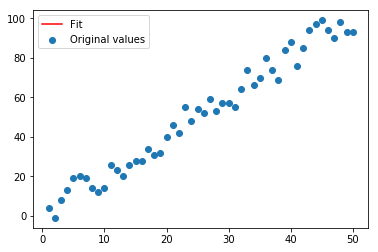

In [19]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x + current_bias
plt.scatter(X.numpy(), y.numpy(), label="Original values") # Original values
plt.plot(x, predicted_y, 'r', label="Fit") # Linear fit to dataset
plt.legend()